# Signal analysis with Fourier Transforms
In this notebook, we will look at the basics for signal processing, using Fourier Transforms.
We start by importing the required modules.

In [73]:
import numpy as np
from IPython.display import display
from ipywidgets import interactive, widgets, interact
from matplotlib import pyplot as plt

Next, we define a signal based on two different $\cos$ waves, with different amplitudes, frequencies and phases, i.e.
$$
x(t) = A_1 \cos(2\pi f_1 t + B_1) + A_2 \cos(2\pi f_2 + B_2)
$$ 

In [74]:
def create_signal(T: float, sampling_rate:float, A1:float, A2:float, f1:float, f2:float, B1:float, B2:float):
    ts = np.linspace(0, T, int(T*sampling_rate), endpoint=False)
    signal = A1 * np.cos(2 * np.pi * f1 * ts + B1) + A2 * np.cos(2 * np.pi * f2 * ts + B2) 
    plt.plot(ts, signal, label="x(t)")
    plt.grid()
    plt.xlabel("t")
    plt.ylabel("y")
    plt.legend()
    plt.show()
    return ts, signal 
w = interactive(create_signal,
                T=widgets.IntSlider(2, min=0, max=10, description="Simulation time (s)",style={'description_width': 'initial'}),
                sampling_rate=widgets.IntSlider(22, min=6, max=256, description="Sampling rate (Hz)"),
                A1=widgets.FloatSlider(3, min=0, max=10),
                A2=widgets.FloatSlider(7, min=0, max=10),
                f1=widgets.IntSlider(6, min=1, max=128),
                f2=widgets.IntSlider(3, min=1, max=128),
                B1=widgets.FloatSlider(32*np.pi/180, min=0, max=2*np.pi),
                B2=widgets.FloatSlider(67*np.pi/180, min=0, max=2*np.pi))
display(w)


interactive(children=(IntSlider(value=2, description='Simulation time (s)', max=10, style=SliderStyle(descript…

# Discrete Fourier transform
The discrete Fourier transform (DFT) takes in a signal from the time-domain and transform it into the frequency domain.
Given samples $(t_n, x_n), n=0,\dots,N-1$, we can write the signal as

$$
\begin{align}
    \hat x_k =\sum_{n=0}^{N-1}x_n\cdot e^{-i2\pi k n/N}
\end{align}
$$
where the amplitude of the signal is equal to  $\frac{\vert \hat x_k\vert}{N}$, and the phase
$\mathrm{atan2}(\mathrm{Im}(\hat x_k), \mathrm{Re}(\hat x_k))$
which means that we can recover a signal from the DFT by computing the inverse transform
$$
\begin{align}
    x_k = \frac{1}{N}\sum_
    {j=0}^{N-1} \hat x_j e^{i 2\pi j k/N}
\end{align}
$$
We can compute the DFT as a matrix-vector product (with $\mathcal{O}(N^2)$ operations)

In [75]:
def DFT(f: np.ndarray)->np.ndarray:
    """
    Compute the discrete Fourier transform of input signal f
    """
    N = len(f)
    n = np.arange(N, dtype=np.float64)
    k = n.reshape(N, 1)
    exponential = np.exp(-2j*np.pi*k*n/N)
    return np.dot(exponential, f)

def iDFT(frequencies: np.ndarray) ->np.ndarray:
    """
    Compute the inverse Discrete Fourier transform
    """
    N = len(frequencies)
    n = np.arange(N, dtype=np.float64)
    k = n.reshape(N, 1)
    exponential = np.exp(2j*np.pi*k*n/N)
    return 1./N*np.dot(exponential, frequencies)

We compute the DFT of our signal and get the following amplitude plot

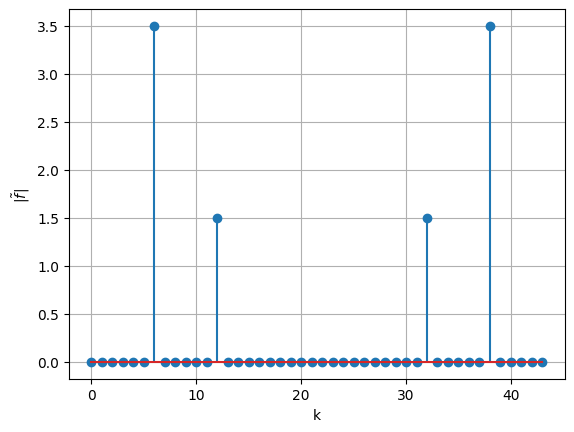

In [76]:
fft_frequencies = DFT(w.result[1])
amplitudes = np.abs(fft_frequencies)/len(w.result[1])
plt.figure()
plt.stem(np.arange(len(fft_frequencies)), amplitudes, label="Amplitude")
plt.xlabel("k")
plt.ylabel(r"$\vert \tilde f \vert$")
plt.grid()
plt.show()

We observe four frequencies corresponding to the frequency $2\pi f/N$, the positive and negative values of $\sin(\omega t)=\frac{1}{2j}(e^{i\omega t}-e^{-i\omega t})$

In [77]:
tol = 1e-6
positions = np.flatnonzero(amplitudes>tol)
print(f"Frequencies {positions}")
print(f"Frequencies/T {positions/w.kwargs['T']}")
print(f"Amplitudes {amplitudes[positions]}")

Frequencies [ 6 12 32 38]
Frequencies/T [ 3.  6. 16. 19.]
Amplitudes [3.5 1.5 1.5 3.5]


We also compute the phase shifts

(Frequency, angle) tuples
(6, 66.99999999999999) (12, 32.00000000000011) (32, -31.999999999999716) (38, -66.99999999999956)


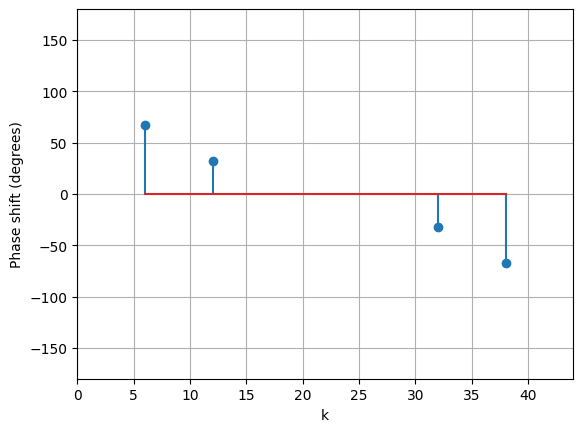

In [78]:
phases = np.angle(fft_frequencies[positions])
print("(Frequency, angle) tuples")
print(" ".join([f"{freq, ang*180/np.pi}" for (freq, ang) in zip(positions, phases)]))
plt.stem(positions, phases*180/np.pi)
plt.axis([0,len(w.result[0]), -180, 180])
plt.ylabel("Phase shift (degrees)")
plt.xlabel("k")
plt.grid()
plt.show()

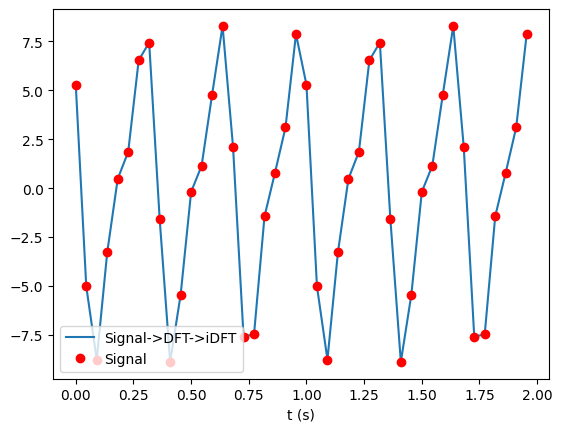

In [79]:
recovered_signal = iDFT(fft_frequencies)
plt.plot(w.result[0], np.real(recovered_signal), label="Signal->DFT->iDFT")
plt.plot(w.result[0], w.result[1], "ro", label="Signal")
plt.xlabel("t (s)")
plt.legend()
plt.show()

We now can filter out all the lower frequencies. We do this by finding the sorting order of the amplitudes, and only choose the top 6 amplitudes

# Spectral density
In the Banks-paper, they compute the Power spectrum  density (PSD) of the signal. You can estimate the PSD by the DFT as the square magnitude of the DFT

$$E=\int_{-\infty}^\infty \vert x(t) \vert^2~\mathrm{d}t$$

which we can write for each frequency as 

$$\bar S_{xx}(f) = \vert\hat x(f)\vert^2$$

## Exercise
1. Compute the spectral density of an FFT

In [80]:
# Insert code here

